In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/fcc-forum-pageviews.csv',parse_dates=['date'],index_col=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
df = df[
    (df['value'] <= df['value'].quantile(0.975)) &
    (df['value'] >= df['value'].quantile(0.025))
]


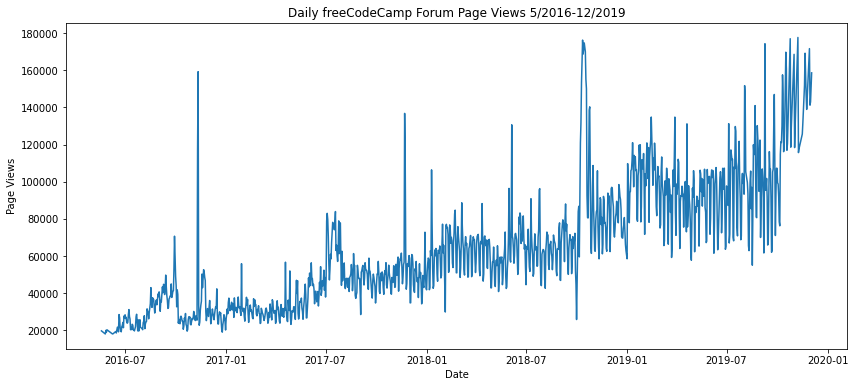

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax = plt.plot(df)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()


In [ ]:
df_date = df.copy()
df_date['month'] = pd.DatetimeIndex(df.index).month_name()
df_date['year'] = pd.DatetimeIndex(df.index).year.values
df_date

,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


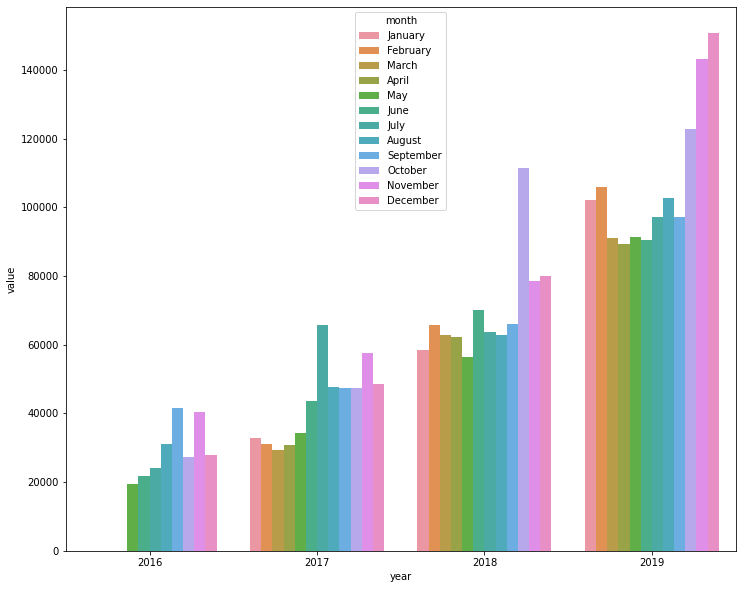

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.barplot(data=df_date,x='year',y='value',hue='month',hue_order=months,ci=None)


In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (seasonality)')

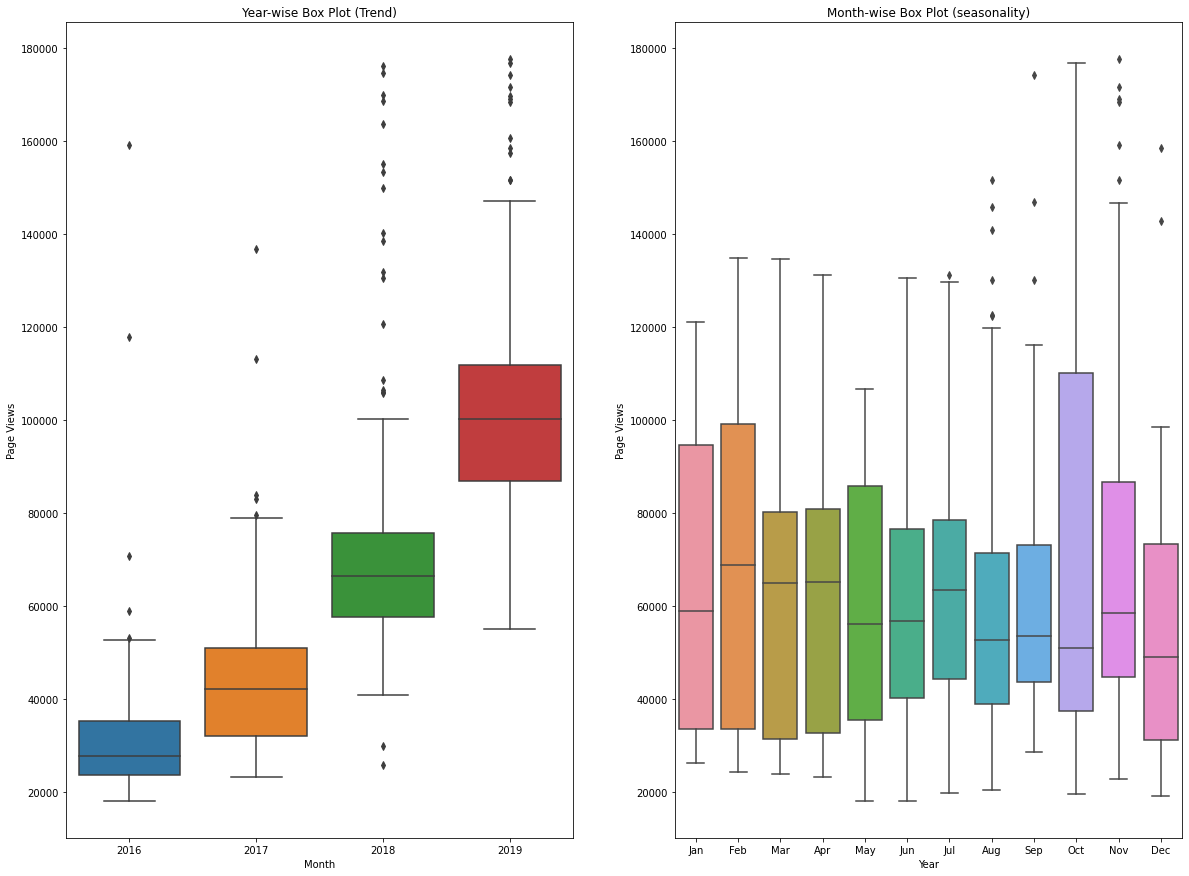

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,15))
ax1 = sns.boxplot(ax=ax1,data=df_box,x='year',y='value')
ax1.set_xlabel('Month')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
ax2 = sns.boxplot(ax=ax2,data=df_box,x='month',y='value')
ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (seasonality)')